In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

plt.rcParams["figure.dpi"] = 200
plt.style.use("seaborn-v0_8")

In [36]:
old_data = [
    (4238.888885655766, 0.00033805570460468664),
    (5457.435579008047, 0.0004565890905339513),
    (10512.61038685622, 0.0009268031751636738),
    (20528.83138594145, 0.0017383690747848977),
    (30610.235204657092, 0.0026010031725310313),
    (40088.322744208876, 0.003664567097565336),
    (50221.65923191386, 0.004404466911507912),
    (70180.73078669592, 0.005968029713846599),
    (101132.57306363028, 0.008748710587424394),
    (200890.476827282, 0.01744117319567241),
    (298523.731632777, 0.02661039137811759),
    (397690.0409795278, 0.03448557910229643),
    (498216.2472957275, 0.04240680075446773),
]
old_data = np.transpose(old_data)

In [37]:
qs = np.array([6.8, 10, 20, 39, 50, 120, 252, 584, 1040, 1720, 1960, 2440, 2760])
Vs = np.array(
    [
        0.003,
        0.0059,
        0.01,
        0.02,
        0.0298,
        0.132,
        0.28,
        0.66,
        1.2,
        1.92,
        2.16,
        2.64,
        3.04,
    ]
)

## New data

In [52]:
VIns = np.array(
    [4, 3.75, 2.49, 2.25, 2.00, 1.75, 1.48, 1.24, 1.00, 0.752, 0.504, 0.251]
)
qs = VIns  # pC
Vs = np.array(
    [1.22, 1.23, 1.22, 1.13, 1.02, 0.892, 0.758, 0.640, 0.520, 0.385, 0.257, 0.124]
)

# New Data x2

In [67]:
VIns = np.array([2, 1.035, 0.536, 0.278, 0.144, 0.0745, 0.05])
qs = VIns
VOuts = np.array([1.14, 0.592, 0.304, 0.161, 0.083, 0.0428, 0.0286])
Vs = 2 * VOuts

1.141 +- 0.0013 V/pC
0.914mV per 5000 electrons
 5471 electrons per 1mV


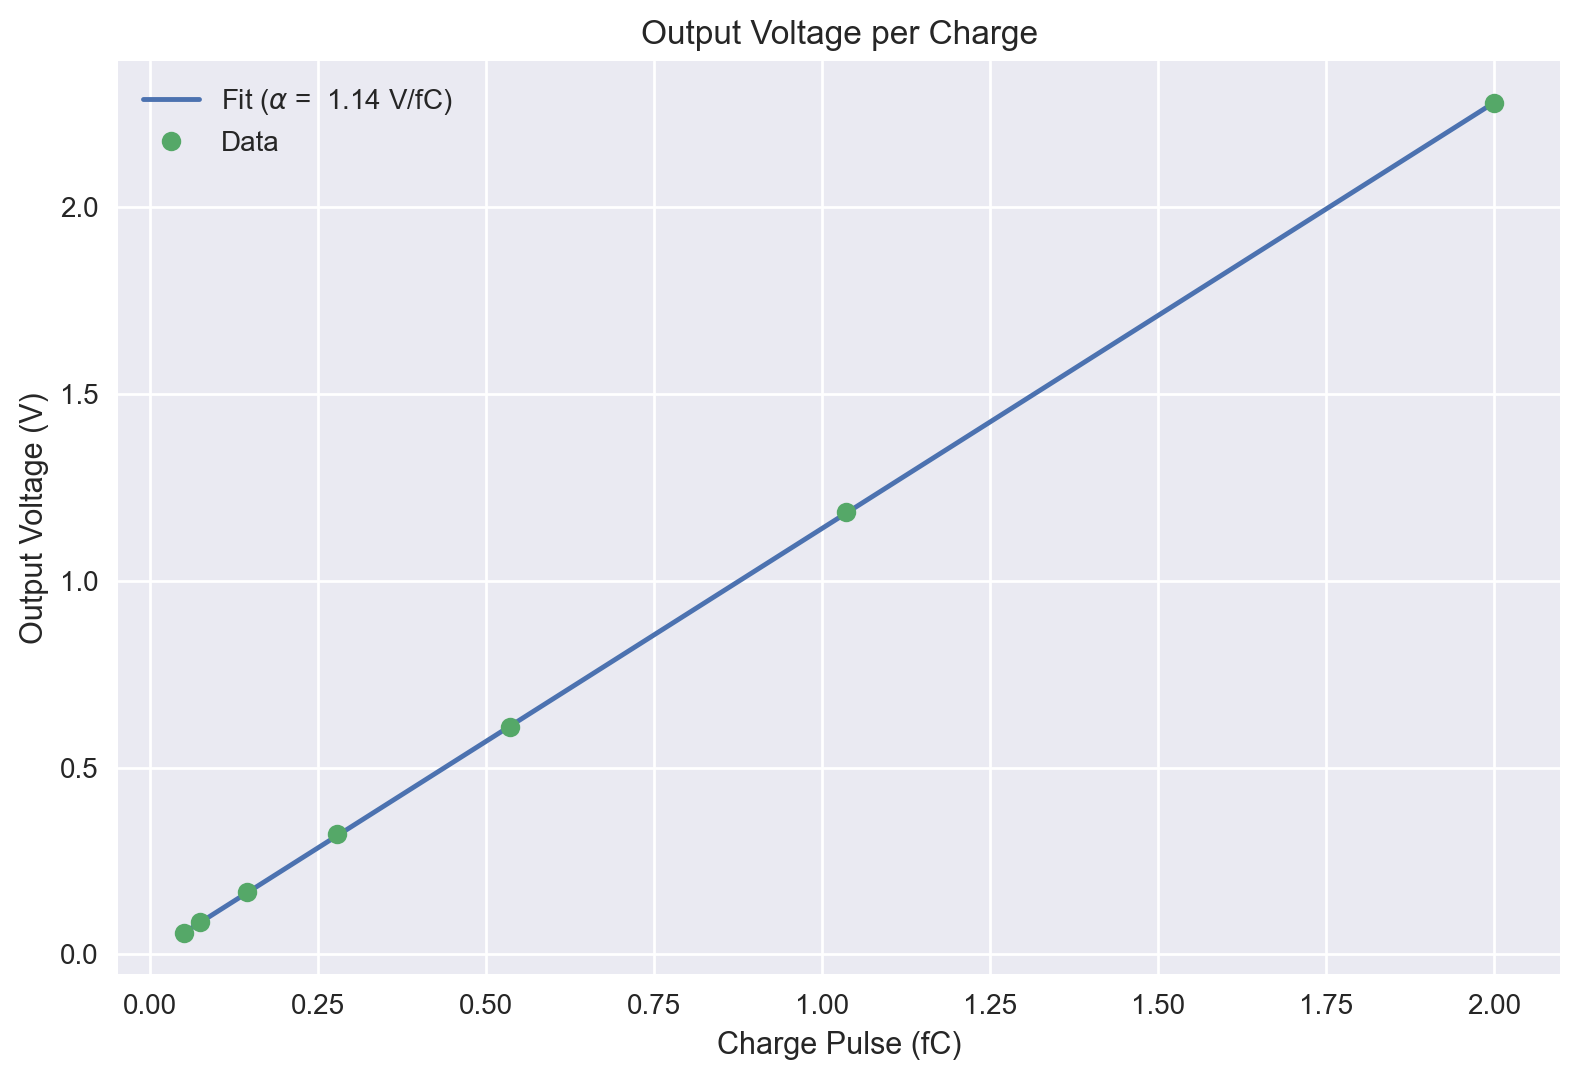

In [73]:
def fit(x, a):
    return a * x + 0


a, cov = curve_fit(fit, qs, Vs)
err = np.sqrt(np.diag(cov))[0]

convert = a[0] * 0.000160218  # convert a (V/fC) to mV/Electron

print(f"{a[0]:.4g} +- {err:0.2g} V/pC")
print(f"{convert*5000 :0.3g}mV per 5000 electrons")
print(f"{1/convert: 0.0f} electrons per 1mV")
plt.plot(qs, fit(qs, a), label=f"Fit ($\\alpha$ = {a[0] : 0.3g} V/fC)")
plt.plot(qs, Vs, linestyle="none", marker="o", label="Data")
plt.legend()
plt.xlabel("Charge Pulse (fC)")
plt.ylabel("Output Voltage (V)")
plt.title("Output Voltage per Charge")
plt.tight_layout()
plt.savefig("./Write up/VperQ.png", dpi=1000)

[1.82671851e-07]


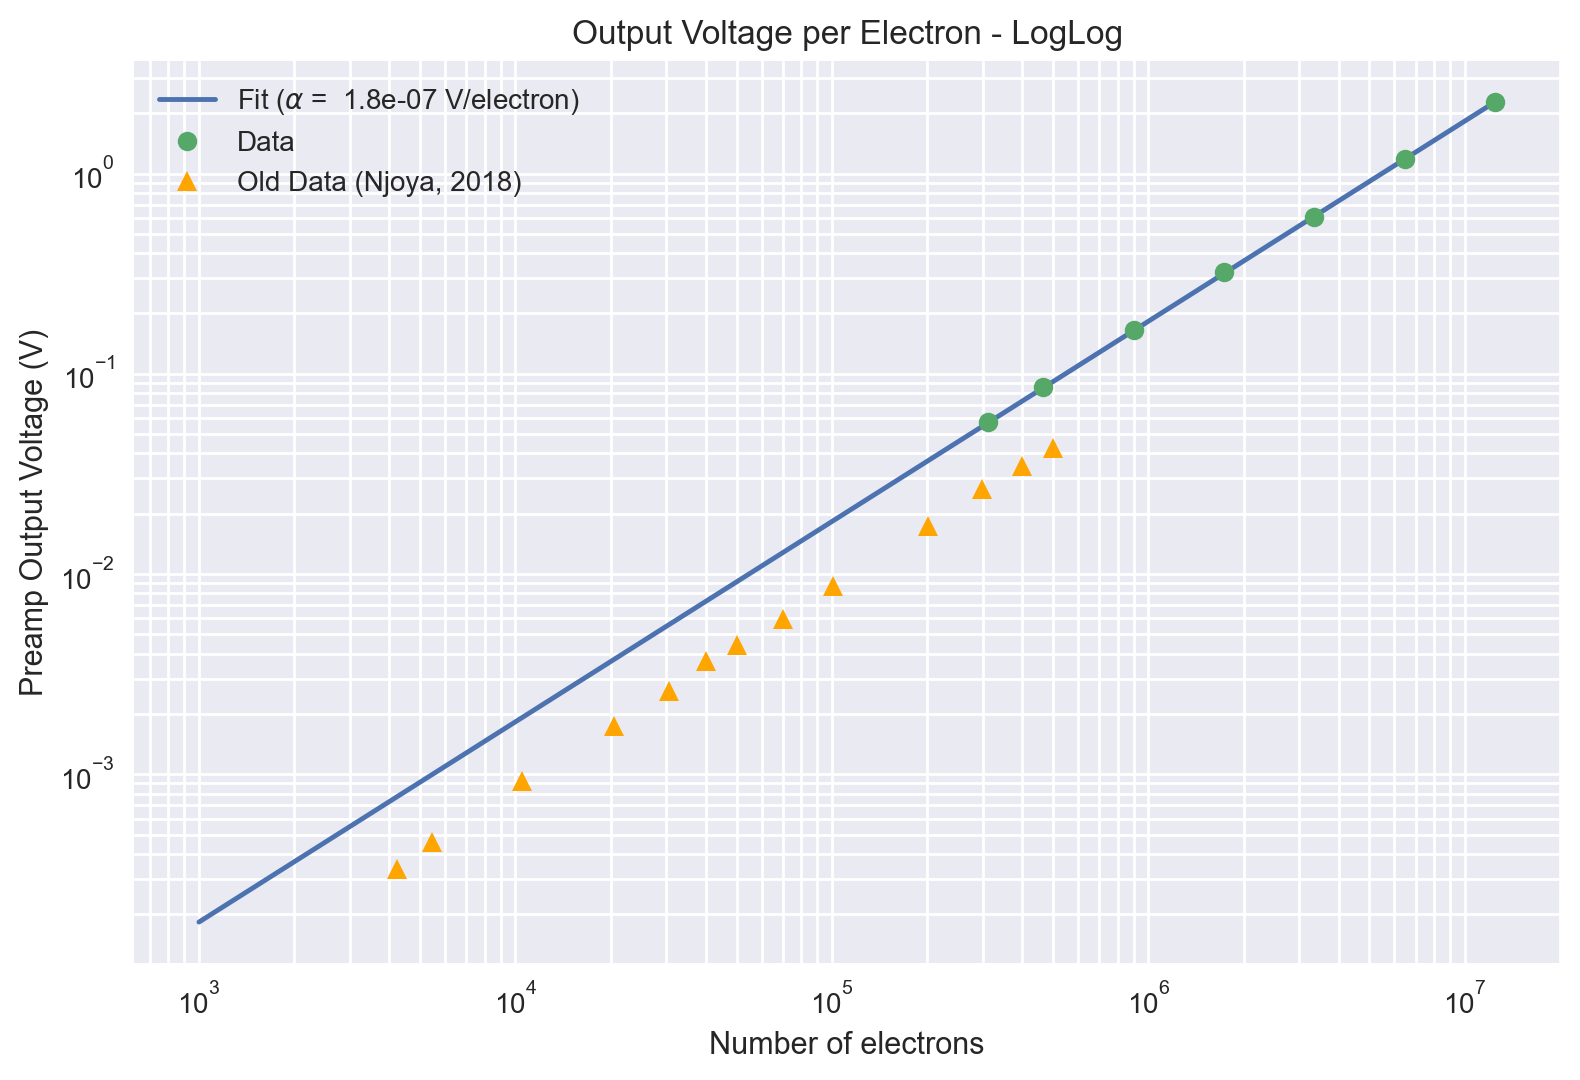

In [79]:
e = 1.602e-19
e_fc = e * 1e15 * 1e-3  # in Fc
nelectrons = qs / e_fc


def fit(x, a):
    return a * x + 0


new_axis = np.linspace(1e3, nelectrons[0], 10)
b, cov2 = curve_fit(fit, nelectrons[2:], Vs[2:])
err = np.sqrt(np.diag(cov2))[0]


plt.plot(
    new_axis,
    fit(new_axis, b),
    label=f"Fit ($\\alpha$ = {convert/1000 : 0.2g} V/electron)",
)

plt.yscale("log")
plt.xscale("log")
plt.plot(nelectrons, Vs, linestyle="none", marker="o", label="Data")
plt.plot(
    old_data[0],
    old_data[1],
    linestyle="none",
    marker="^",
    color="orange",
    label="Old Data (Njoya, 2018)",
)
plt.legend()
plt.grid(visible=True, which="both")
plt.xlabel("Number of electrons")
plt.ylabel("Preamp Output Voltage (V)")
plt.title("Output Voltage per Electron - LogLog")
plt.tight_layout()
plt.savefig("./Write up/VperN.png", dpi=1000)
print(b)

array([1.38401649e-14])

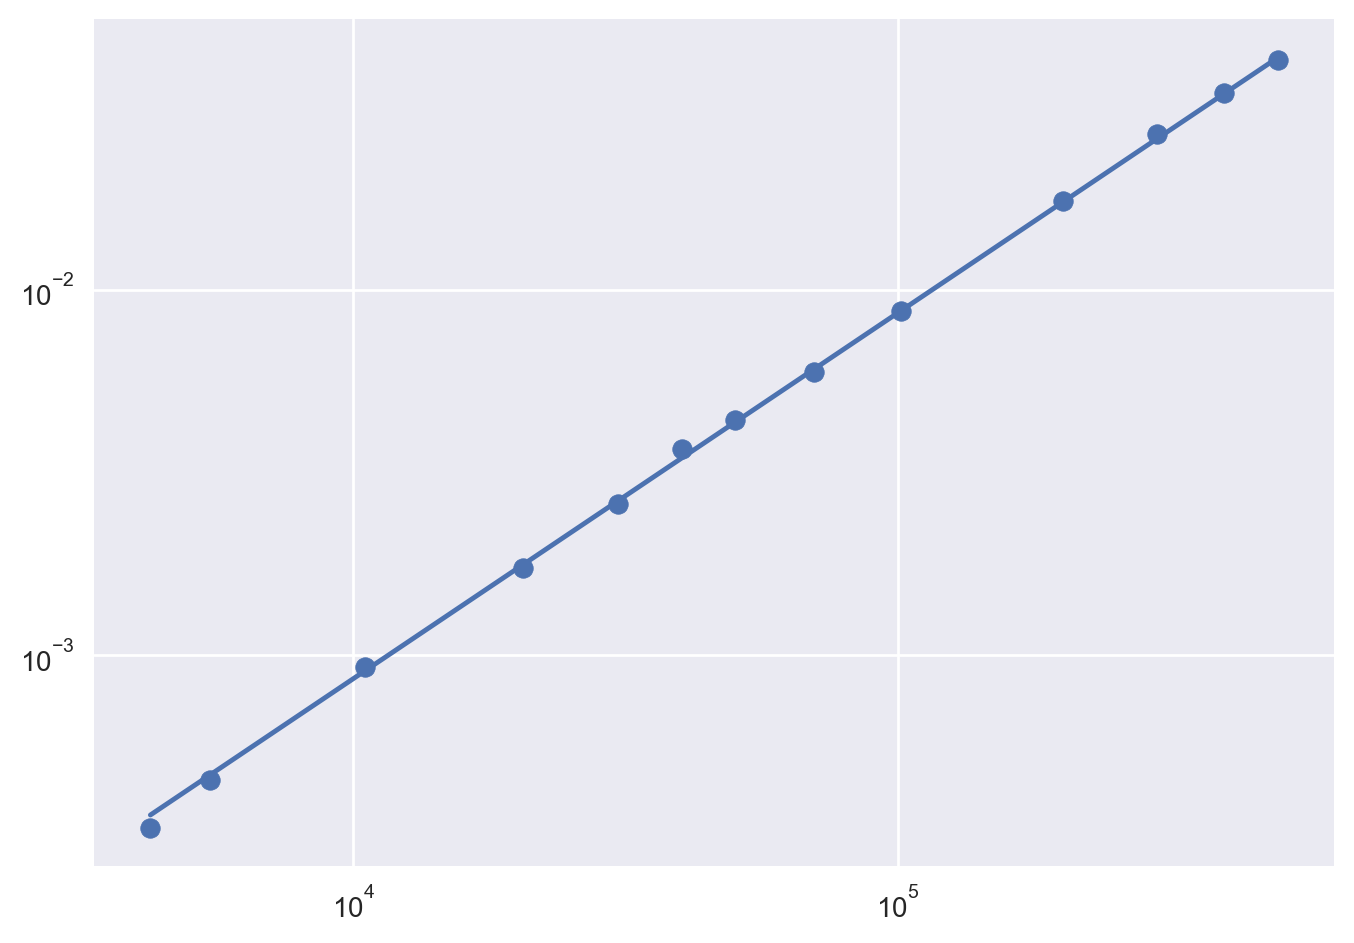

In [47]:
c, cov = curve_fit(fit, old_data[0], old_data[1])
plt.scatter(old_data[0], old_data[1])
plt.plot(old_data[0], fit(old_data[0], c[0]))

plt.yscale("log")
plt.xscale("log")
c * e_fc / 1000

# Shaper

In [84]:
s_qs = [960, 680, 392]
s_vs = [3.53, 2.52, 1.37]


1.1 +- 0.0061 V/fC
0.882mV per 5000 electrons


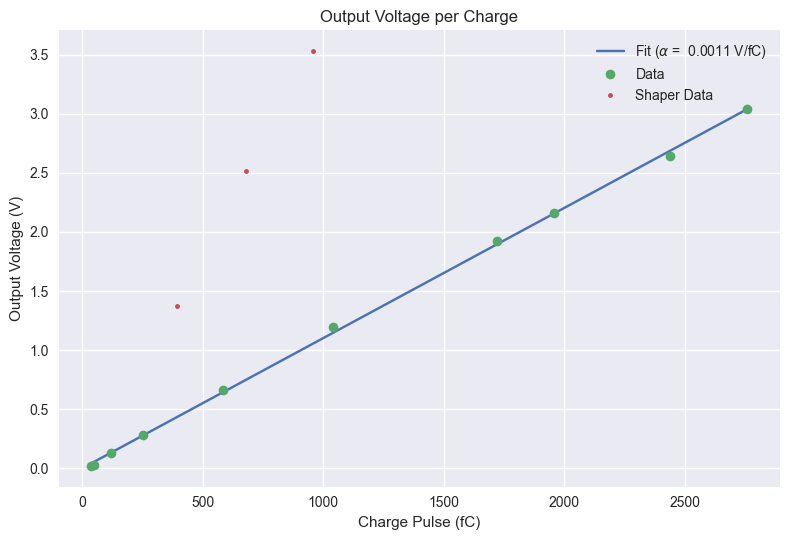

In [88]:
def fit(x, a):
    return a * x + 0


a, cov = curve_fit(fit, qs, Vs)
err = np.sqrt(np.diag(cov))[0] * 1000

convert = a[0] * 0.000160218 * 1000  # convert a (V/fC) to mV/Electron

print(f"{a[0]*1000:.3g} +- {err:0.2g} V/fC")
print(f"{convert*5000 :0.3g}mV per 5000 electrons")
plt.plot(qs, fit(qs, a), label=f"Fit ($\\alpha$ = {a[0] : 0.3g} V/fC)")
plt.plot(qs, Vs, linestyle="none", marker="o", label="Data")
plt.plot(s_qs, s_vs, linestyle="none", marker=".", label="Shaper Data")
plt.legend()
plt.xlabel("Charge Pulse (fC)")
plt.ylabel("Output Voltage (V)")
plt.title("Output Voltage per Charge")
plt.tight_layout()
plt.savefig("./Write up/shaper.png", dpi=1000)

In [58]:
for i in np.linspace(0, -4, 15):
    print(2 * 1 * 10**i)

2.0
1.0358949358462424
0.5365391590559452
0.27789909887462755
0.14393713460023042
0.07455187440629883
0.03861395457766501
0.02
0.010358949358462426
0.005365391590559454
0.002778990988746278
0.0014393713460023043
0.0007455187440629883
0.0003861395457766503
0.0002
